In [2]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [3]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title('title')
            axes[x,y].plot(list(signals))
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fft(fft):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            data = fft
            Y, freq = data[0], data[1]
            axes[x,y].set_title('fftplot)')
            axes[x,y].plot(freq, Y)
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title('fbanktitle')
            axes[x,y].imshow(list(fbank),
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=2, ncols=5, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for x in range(2):
        for y in range(5):
            axes[x,y].set_title('mfcctitle')
            axes[x,y].imshow(list(mfccs),
                    cmap='hot', interpolation='nearest')
            axes[x,y].get_xaxis().set_visible(False)
            axes[x,y].get_yaxis().set_visible(False)
            i += 1

In [4]:
def calculate_fft(signal, rate):
    """Calculate Fast Fourier Transform"""
    n = len(signal)
    frequency = np.fft.rfftfreq(n, d=1/rate)
    magnitude = abs(np.fft.rfft(signal)/n) # Magnitude also respresented as Y and signal as y
    return (magnitude, frequency)


def my_logfbank(signal, rate, nfilt, nfft):
    # nfft is the window size, usually 25ms, so sampling_rate*0.025. nfft will be padded with 0 to match a power of 2
    bank = logfbank(signal, rate, nfilt=nfilt, nfft=nfft).T # transpose it
    return bank

In [5]:
filename = 'OAF_youth_happy.wav'

In [6]:
signal, rate = librosa.load(filename, sr=24414)

In [7]:
rate*0.025

610.35

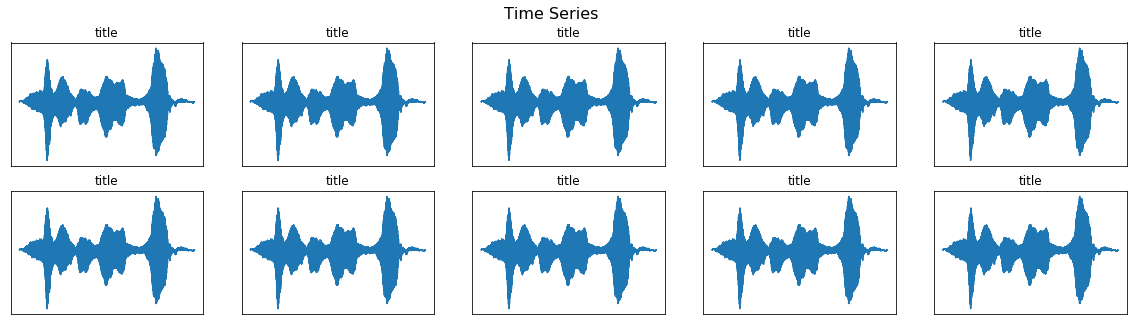

In [8]:
plot_signals(signal)
plt.show()

In [9]:
fft = calculate_fft(signal, rate)

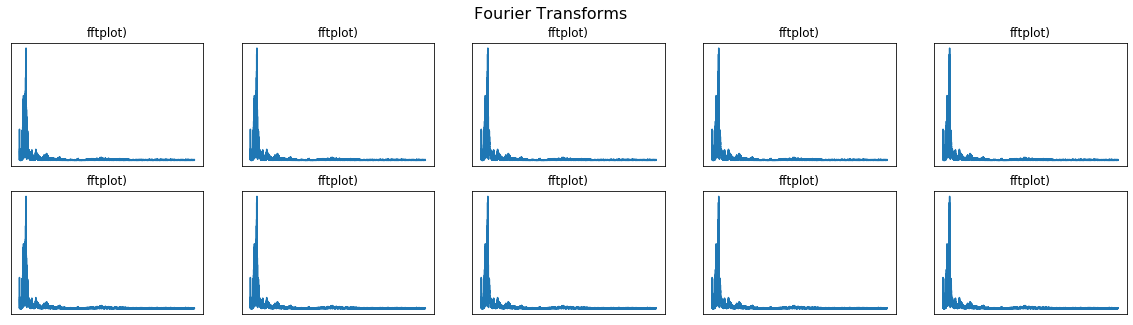

In [10]:
plot_fft(fft)
plt.show()

In [11]:
fbank = my_logfbank(signal[:], rate, nfilt=26, nfft=int(rate*0.025))  # for 1 second, why?
fbank.shape

(26, 206)

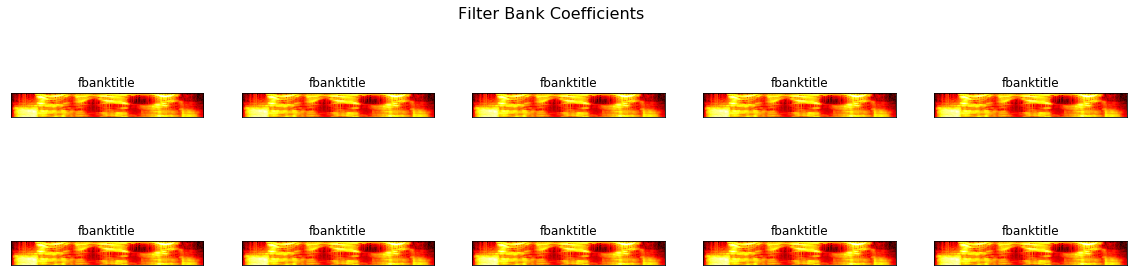

In [12]:
plot_fbank(fbank)

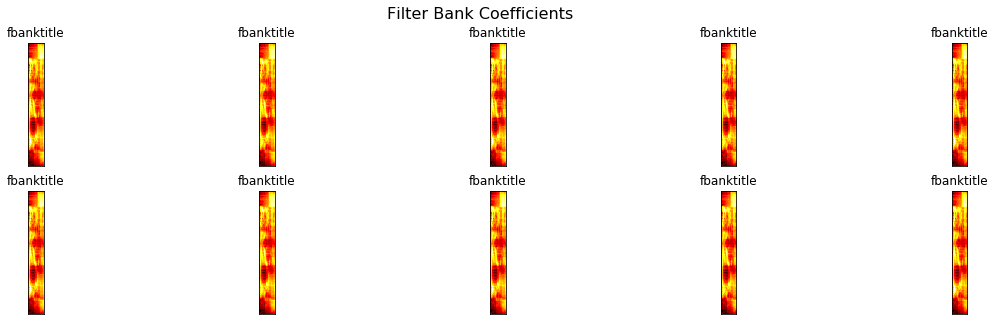

In [13]:
plot_fbank(fbank.T)

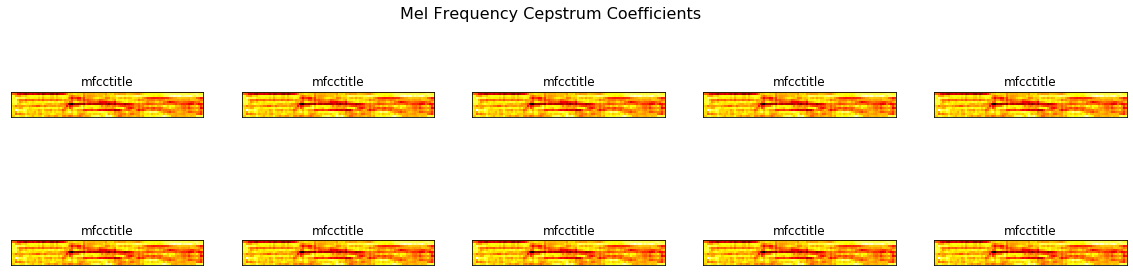

In [14]:
mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26).T ## for 1 second, why? also transpose
plot_mfccs(mel)

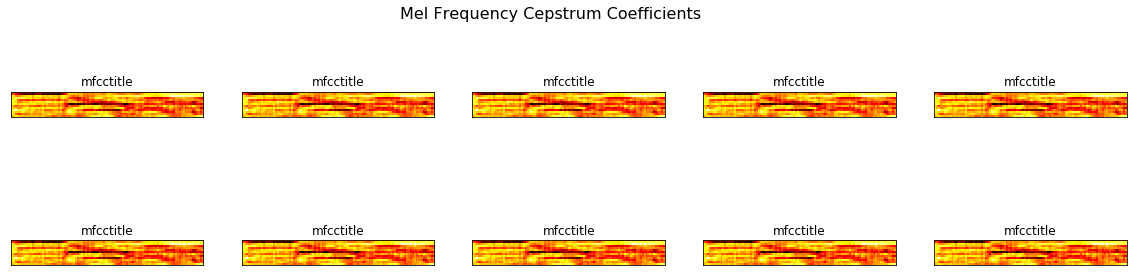

In [15]:
mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=int(rate*0.025)).T ## for 1 second, why? also transpose
plot_mfccs(mel)

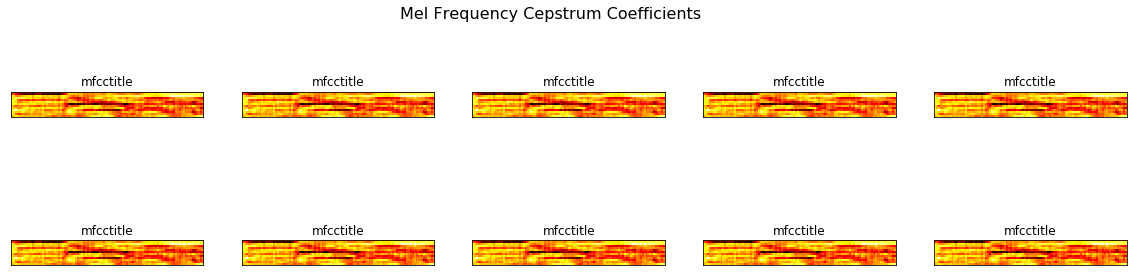

In [16]:
mel = mfcc(signal[:rate], rate, numcep=13, nfilt=26, nfft=int(rate*0.025)).T ## for 1 second, why? also transpose
plot_mfccs(mel)

In [20]:
mel.shape

(13, 99)

In [19]:
mel

array([[-12.88337392, -12.76004671, -10.63827262, ...,  -6.34779661,
         -6.07120889,  -6.15645406],
       [-18.27760018, -15.60527603, -24.61014094, ...,  20.14534571,
         13.80217196,  15.96387774],
       [ 12.57133438,   5.18272811,  -3.38379977, ...,  21.73486634,
         15.42605417,  22.7157455 ],
       ...,
       [ 10.64328663,  14.44605471,   4.15737664, ..., -10.46240751,
        -20.91856984,  -7.91195445],
       [  6.46712641,   8.65281006,  -8.22541559, ..., -10.20631151,
        -12.46720384, -11.49971162],
       [  0.63132639,   5.1619702 ,  10.66875891, ...,  19.56424551,
         23.60231663,  21.01772856]])

In [20]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [58]:
#mask = envelope(signal, rate, 0.0005) #mess around with this threshold value later
mask = envelope(signal, rate, 0.001) #mess around with this threshold value later
signal_with_mask = signal[mask]
print(len(signal))
print(len(signal_with_mask))

50416
48919


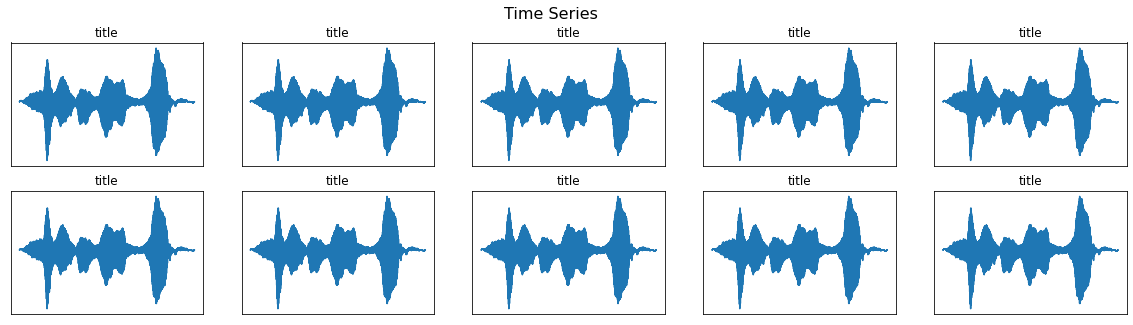

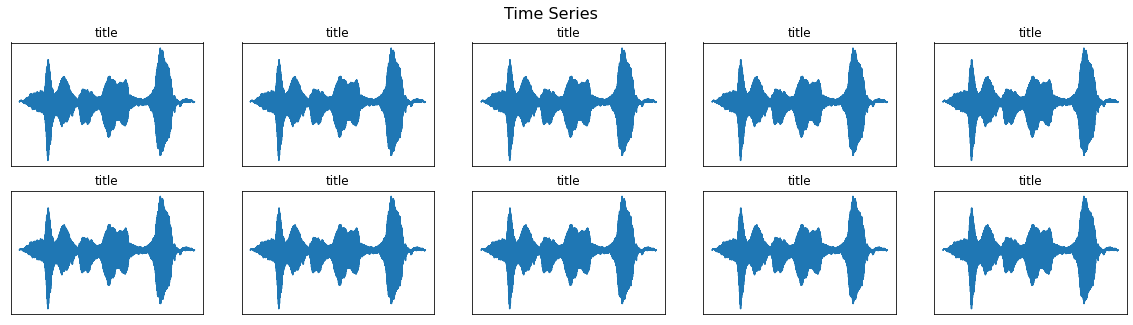

In [59]:
plot_signals(signal)
plot_signals(signal_with_mask)

In [17]:
def freq_to_mel(f):
    return 1127*np.log(1 + (f/700))

def mel_to_freq(mel):
    return 700*((np.e**(mel/1127)) - 1)

freq_to_mel(mel_to_freq(11000))
freq_to_mel(11000)

3173.929286531733

In [18]:
nfilt = 26
nfft = 512#rate*0.025 # 512
fbank = np.zeros((nfilt, int(np.floor(nfft/2 + 1))))

In [19]:
fbank

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
print(fbank.shape)
print(len(fbank))
print(len(fbank[0]))

(26, 257)
26
257
